In [1]:
import pandas as pd

In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [ ]:
# train = pd.read_csv('data/elo/train.csv')
# merchants = pd.read_csv('data/elo/merchants.csv')
# new_merchant_txns = pd.read_csv('data/elo/new_merchant_transactions.csv')
# historical_txns = pd.read_csv('data/elo/historical_transactions.csv')

# train.to_feather('data/elo/feather/train')
# merchants.to_feather('data/elo/feather/merchants')
# new_merchant_txns.to_feather('data/elo/feather/new_merchant_txns')
# historical_transactions.to_feather('data/elo/feather/historical_txns')

In [3]:
import feather

train = feather.read_dataframe('data/elo/feather/train')
# merchants = feather.read_dataframe('data/elo/feather/merchants')
# new_merchant_txns = feather.read_dataframe('data/elo/feather/new_merchant_txns')
# historical_txns = feather.read_dataframe('data/elo/feather/historical_txns')

In [4]:
train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null object
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [12]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [6]:
merchants.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


In [7]:
merchants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
merchant_id                    334696 non-null object
merchant_group_id              334696 non-null int64
merchant_category_id           334696 non-null int64
subsector_id                   334696 non-null int64
numerical_1                    334696 non-null float64
numerical_2                    334696 non-null float64
category_1                     334696 non-null object
most_recent_sales_range        334696 non-null object
most_recent_purchases_range    334696 non-null object
avg_sales_lag3                 334683 non-null float64
avg_purchases_lag3             334696 non-null float64
active_months_lag3             334696 non-null int64
avg_sales_lag6                 334683 non-null float64
avg_purchases_lag6             334696 non-null float64
active_months_lag6             334696 non-null int64
avg_sales_lag12                334683 non-null float64
avg_purchases_lag12    

In [13]:
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [8]:
new_merchant_txns.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.851286e+06,1.963031e+06,1.963031e+06
mean,1.343867e+02,6.829643e-01,4.309701e+02,1.476515e+00,-5.509690e-01,2.197841e+00,1.088067e+01,2.597624e+01
std,1.015152e+02,1.584069e+00,2.463385e+02,4.994483e-01,6.940043e-01,1.528125e+00,6.038542e+00,1.012908e+01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-7.468928e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,6.900000e+01,0.000000e+00,2.780000e+02,1.000000e+00,-7.166294e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,1.100000e+02,1.000000e+00,3.670000e+02,1.000000e+00,-6.748406e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,6.830000e+02,2.000000e+00,-5.816162e-01,3.000000e+00,1.500000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,2.631575e+02,5.000000e+00,2.400000e+01,4.100000e+01


In [9]:
new_merchant_txns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                int64
subsector_id            int64
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB


In [14]:
new_merchant_txns.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [10]:
historical_txns.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


In [11]:
historical_txns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                int64
subsector_id            int64
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


In [15]:
historical_txns.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


# Base model

In [4]:
import keras

from keras.models import Model
from keras.layers import Dense, Flatten, Input

from keras.utils import plot_model
import matplotlib.pyplot as plt

In [5]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [25]:
# Load train data

y_train = train['target']
X_train = train.drop(['target', 'card_id'], axis=1)

X_train.shape, y_train.shape

((201917, 4), (201917,))

In [104]:
X_train.head()

,first_active_month,feature_1,feature_2,feature_3,months_active
0,2017-06,5,2,1,18
1,2017-01,4,1,0,23
2,2016-08,2,2,0,28
3,2017-09,4,3,0,15
4,2017-11,1,3,0,13


In [163]:
from datetime import date
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta

rel_delta = lambda row: relativedelta(date.today(), parse(row))
month_deltas = lambda row: (row.years * 12) + row.months

def get_months_active(df):
    active = pd.DataFrame()

    active = (df.apply(rel_delta)).apply(month_deltas)
    
    return active

In [99]:
X_train['months_active'] = get_months_active(X_train['first_active_month'])

In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 5 columns):
first_active_month    201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
months_active         201917 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.7+ MB


In [103]:
X_train.head()

,first_active_month,feature_1,feature_2,feature_3,months_active
0,2017-06,5,2,1,18
1,2017-01,4,1,0,23
2,2016-08,2,2,0,28
3,2017-09,4,3,0,15
4,2017-11,1,3,0,13


In [108]:
X_train = X_train.drop('first_active_month', axis=1)
X_train.head()

,feature_1,feature_2,feature_3,months_active
0,5,2,1,18
1,4,1,0,23
2,2,2,0,28
3,4,3,0,15
4,1,3,0,13


In [201]:
input = Input(shape=(4,))
output = Dense(1)(input)
# flatten = Flatten(0)(output)

model = Model(input, output)

In [202]:
model.compile(optimizer='adam', loss=root_mean_squared_error)

In [203]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 4)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [204]:
plot_model(model, to_file='model.png')

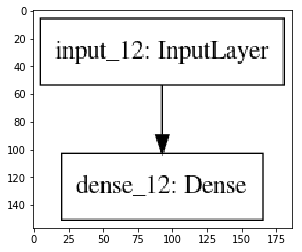

In [205]:
model_img = plt.imread('model.png')
plt.imshow(model_img)
plt.show()

In [206]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=True)

Train on 161533 samples, validate on 40384 samples
Epoch 1/10
161533/161533 [==============================] - 4s 22us/step - loss: 4.5541 - val_loss: 3.4884
Epoch 2/10
161533/161533 [==============================] - 3s 20us/step - loss: 3.3768 - val_loss: 3.4839
Epoch 3/10
161533/161533 [==============================] - 3s 20us/step - loss: 3.3824 - val_loss: 3.4831
Epoch 4/10
161533/161533 [==============================] - 3s 20us/step - loss: 3.3724 - val_loss: 3.4881
Epoch 5/10
161533/161533 [==============================] - 3s 20us/step - loss: 3.3912 - val_loss: 3.4893
Epoch 6/10
161533/161533 [==============================] - 3s 20us/step - loss: 3.3914 - val_loss: 3.4827
Epoch 7/10
161533/161533 [==============================] - 3s 21us/step - loss: 3.3747 - val_loss: 3.4853
Epoch 8/10
161533/161533 [==============================] - 3s 20us/step - loss: 3.3903 - val_loss: 3.4826
Epoch 9/10
161533/161533 [==============================] - 3s 20us/step - loss: 3.3895 - val

In [172]:
test = pd.read_csv('data/elo/test.csv')

In [173]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
first_active_month    123622 non-null object
card_id               123623 non-null object
feature_1             123623 non-null int64
feature_2             123623 non-null int64
feature_3             123623 non-null int64
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


In [174]:
test.describe()

,feature_1,feature_2,feature_3
count,123623.00000,123623.000000,123623.000000
mean,3.10926,1.741796,0.564377
std,1.18911,0.749195,0.495840
min,1.00000,1.000000,0.000000
25%,2.00000,1.000000,0.000000
50%,3.00000,2.000000,1.000000
75%,4.00000,2.000000,1.000000
max,5.00000,3.000000,1.000000


In [175]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [177]:
card_id = test['card_id']

X_test = test.drop('card_id', axis=1)

X_test.shape, card_id.shape

((123623, 4), (123623,))

In [178]:
X_test['first_active_month'].isna().values.sum()

1

In [179]:
X_test['first_active_month'] = X_test['first_active_month'].fillna(date.today().strftime("%Y-%m"))

In [180]:
X_test['first_active_month'].isna().values.sum()

0

In [181]:
X_test['months_active'] = get_months_active(X_test['first_active_month'])

In [182]:
X_test.head()

,first_active_month,feature_1,feature_2,feature_3,months_active
0,2017-04,3,3,1,20
1,2017-01,2,3,0,23
2,2017-08,5,1,1,16
3,2017-12,2,1,0,12
4,2015-12,5,1,1,36


In [183]:
X_test = X_test.drop('first_active_month', axis=1)

In [184]:
X_test.head()

,feature_1,feature_2,feature_3,months_active
0,3,3,1,20
1,2,3,0,23
2,5,1,1,16
3,2,1,0,12
4,5,1,1,36


In [207]:
predictions = model.predict(X_test)

In [218]:
submissions=pd.DataFrame({"card_id": card_id,
                         "target": predictions.flatten()})
submissions.to_csv("base_model-20181207.csv", index=False, header=True)

Resources: 

https://blog.statsbot.co/machine-learning-algorithms-183cc73197c

https://becominghuman.ai/making-a-simple-neural-network-classification-2449da88c77e

https://www.datacamp.com/community/tutorials/categorical-data